# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

❓ Go ahead and load the CSV into a dataframe called `df`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(url)
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [4]:
df = df.drop_duplicates()

## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "median"` (numerical variables) ❓


In [5]:
round(df.isnull().sum().sort_values(ascending=False)/len(df),3) #NaN percentage for each column

enginelocation    0.052
carwidth          0.010
aspiration        0.000
curbweight        0.000
enginetype        0.000
cylindernumber    0.000
stroke            0.000
peakrpm           0.000
price             0.000
dtype: float64

### `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [6]:
df['carwidth'].isna().sum()

2

In [7]:
df.dtypes

aspiration         object
enginelocation     object
carwidth           object
curbweight          int64
enginetype         object
cylindernumber     object
stroke            float64
peakrpm             int64
price              object
dtype: object

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df = df.replace("*", np.nan)
imputer.fit(df[['carwidth']])
df['carwidth'] = imputer.transform(df[['carwidth']])
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,65.5,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive


### `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [9]:
df['enginelocation'].unique()

array(['front', nan, 'rear'], dtype=object)

In [10]:
df.enginelocation.value_counts(dropna=False)

front    179
NaN       10
rear       2
Name: enginelocation, dtype: int64

In [11]:
engine_imputer = SimpleImputer(strategy="most_frequent")

In [12]:
engine_imputer.fit(df[['enginelocation']])

SimpleImputer(strategy='most_frequent')

In [13]:
df['enginelocation'] = engine_imputer.transform(df[['enginelocation']])

In [14]:
df['enginelocation'].value_counts(dropna=False)

front    189
rear       2
Name: enginelocation, dtype: int64

🧪 **Test your code**

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_carwidth PASSED         [ 50%]
test_missing_values.py::TestMissing_values::test_engine_location PASSED  [100%]

============================== 2 passed in 0.55s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



## (3) Scaling the numerical features

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

In [16]:
from sklearn.preprocessing import RobustScaler

In [17]:
import seaborn as sns

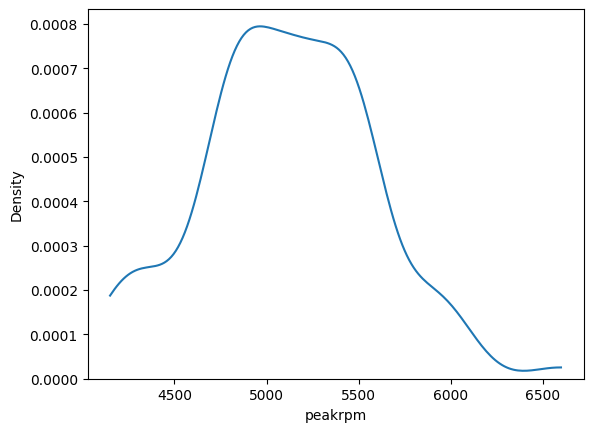

In [18]:
sns.kdeplot(data=df, x="peakrpm", cut=0, cumulative=False);

In [23]:
robust_scaler = RobustScaler()

In [24]:
df['peakrpm'], df['carwidth'], df['stroke'] = robust_scaler.fit_transform(df[['peakrpm', 'carwidth', 'stroke']]).T

In [25]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


In [153]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() 

r_scaler.fit(df[['peakrpm', 'carwidth', 'stroke']]) 

df[['peakrpm', 'carwidth', 'stroke']] = r_scaler.transform(df[['peakrpm', 'carwidth', 'stroke']])

df.head()

### `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

<AxesSubplot:ylabel='Frequency'>

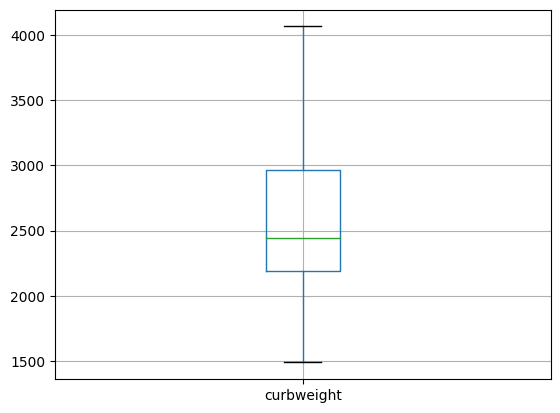

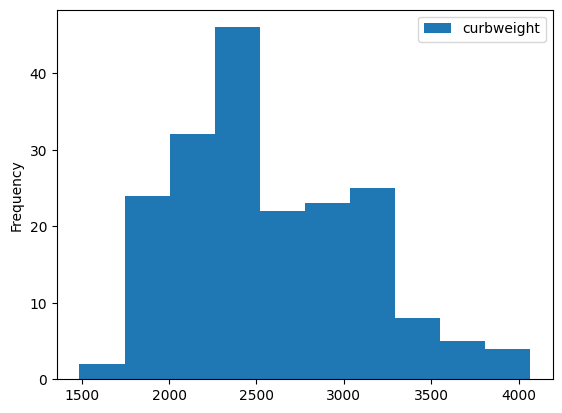

In [26]:
df[['curbweight']].boxplot()
df[['curbweight']].plot.hist(bins=10)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
curb_scaler = StandardScaler()

In [29]:
df['curbweight'] = curb_scaler.fit_transform(df[['curbweight']])

In [30]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


🧪 **Test your code**

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 4 items

test_scaling.py::TestScaling::test_carwidth PASSED                       [ 25%]
test_scaling.py::TestScaling::test_curbweight PASSED                     [ 50%]
test_scaling.py::TestScaling::test_peakrpm PASSED                        [ 75%]
test_scaling.py::TestScaling::test_stroke PASSED                         [100%]

============================== 4 passed in 0.55s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [32]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [33]:
df['aspiration'].value_counts()

std      156
turbo     35
Name: aspiration, dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')

df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration', 'enginelocation']]).T


In [35]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


In [36]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [37]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [44]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

enginetype_ohe = ohe.fit_transform(df[['enginetype']])

In [48]:
ohe.categories_[0]

array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)

In [40]:
ohe.get_feature_names_out()

array(['enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor'], dtype=object)

In [42]:
df[ohe.categories_[0]] = enginetype_ohe

In [43]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [80]:
df['dohc'], df['dohcv'], df['l'], df['ohc'], df['ohcf'], df['ohcv'], df['rotor'] = enginetype_ohe.T

In [81]:
encoded_engine = pd.DataFrame(enginetype_ohe, columns=ohe.get_feature_names_out())
encoded_engine

,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
df.drop(columns='enginetype', inplace=True)

In [58]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded into numeric.

</details>

In [49]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [50]:
df['cylindernumber'] = df['cylindernumber'].map({
                                            'four': 4,
                                            'six': 6,
                                            'five': 5,
                                            'three': 3,
                                            'twelve': 12,
                                            'two': 2,
                                            'eight': 8})

In [51]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [52]:
df['cylindernumber'].value_counts()

4     147
6      23
5      11
8       5
2       3
3       1
12      1
Name: cylindernumber, dtype: int64

<AxesSubplot:>

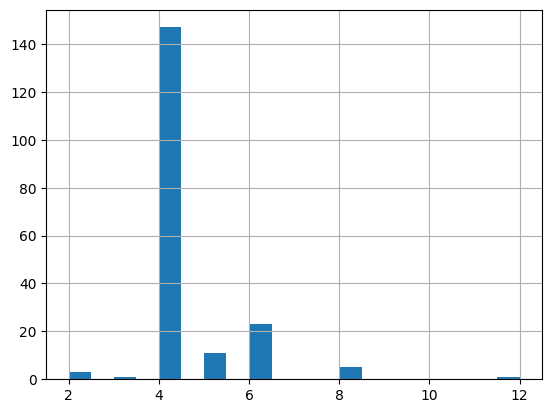

In [53]:
df['cylindernumber'].hist(bins=20)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mm_scaler = MinMaxScaler()

In [56]:
df['cylindernumber'] = mm_scaler.fit_transform(df[['cylindernumber']])

In [57]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,dohc,0.2,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,ohcv,0.4,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,ohc,0.2,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,ohc,0.3,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,ohc,0.3,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


❓ Now that you've made `cylindernumber` into a numeric feature between 2 and 12, you need to scale it.

<br/>

<details>
    <summary>💡 Hint </summary>

Ordinal numeric features should be normalized (using MinMaxScaler).
</details>

### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [58]:
df['price'].unique()

array(['expensive', 'cheap'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['price'] = encoder.fit_transform(df['price'])

🧪 **Test your code**

In [60]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_aspiration PASSED                   [ 25%]
test_encoding.py::TestEncoding::test_enginelocation PASSED               [ 50%]
test_encoding.py::TestEncoding::test_enginetype PASSED                   [ 75%]
test_encoding.py::TestEncoding::test_price PASSED                        [100%]

============================== 4 passed in 0.55s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [70]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,0.2,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,0.4,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,0.2,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,0.3,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,0.3,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

In [72]:
X

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,0.2,-2.033333,-0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,0.4,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,0.2,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,0.3,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,0.3,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,1.259259,0.722416,0.2,-0.466667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,1.0,0.0,1.222222,0.907408,0.2,-0.466667,0.285714,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,0.0,0.0,1.259259,0.836844,0.4,-1.400000,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,1.0,0.0,1.259259,1.227807,0.4,0.366667,-0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [73]:
model = LogisticRegression()

In [74]:
scores = cross_val_score(model, X, y, cv=10)

In [75]:
base_model_score = scores.mean()

In [76]:
base_model_score

0.8744736842105262

🧪 **Test your code**

In [77]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (6) Feature Selection

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset until you notice model performance dropping substantially
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [78]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

In [79]:
# Evaluate model without permutation
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv=5)
score = cv_results['test_score'].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")

Before any feature permutation, the cross-validated accuracy is equal to 0.86


In [80]:
# Question 1: Permutation importance
model = LogisticRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)

In [107]:
# The permutation feature importance is the decrease in a model score when a single feature value is randomly shuffled

In [81]:
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T,
                            columns= ['feature', 'feature_importance'])


In [82]:
print("After feature permutation, here are the decreases in terms of scores:")
importance_df = importance_df.sort_values(by='feature_importance', ascending=False)
importance_df

After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
3,curbweight,0.306073
2,carwidth,0.110209
5,stroke,0.032356
11,ohcf,0.019162
6,peakrpm,0.01089
10,ohc,0.010733
0,aspiration,0.007958
7,dohc,0.005864
13,rotor,0.005759
12,ohcv,0.002461


In [83]:
# Question 2: Remove weak features
threshold = 0.05

weak_features = importance_df[importance_df.feature_importance <= threshold]['feature'].values
weak_features

array(['stroke', 'ohcf', 'peakrpm', 'ohc', 'aspiration', 'dohc', 'rotor',
       'ohcv', 'cylindernumber', 'dohcv', 'l', 'enginelocation'],
      dtype=object)

In [84]:
# Question 3 - Cross validating the model with strong features only
X_strong_features = df.drop(columns=list(weak_features) + ['price'])

print(f"Our strong features are {list(X_strong_features.columns)}")

Our strong features are ['carwidth', 'curbweight']


In [85]:
model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv=5)

strong_model_score = scores.mean()

print(f"Before removing weak features, the cross-validated accuracy was equal to {round(score,2)}")

print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,2)}")

Before removing weak features, the cross-validated accuracy was equal to 0.86
The LogisticRegression fitted with the strong features only has a score of 0.91


🧪 **Test your code**

In [86]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_strong_model.py::TestStrong_model::test_strong_model_score PASSED   [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master



## Bonus - Stratifying your data ⚖️

💡 As we split our data into training and testing, we need to be mindful of the proportion of categorical variables in our dataset - whether it's the classes of our target `y` or a categorical feature in `X`.

Let's have a look at an example 👇

❓ Split your original `X` and `y` into training and testing data, using sklearn's `train_test_split`; use `random_state=1` and `test_size=0.3` to have comparable results.

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

❓ Check the proportion of `price` class `1` cars in your training dataset and testing dataset.

> _If you check the proportion of them in the raw `df`, it should be very close to 50/50_

In [88]:
print("The training data share of class 1 cars:", y_train.mean())
print("The testing data share of class 1 cars:", y_test.mean())

The training data share of class 1 cars: 0.5037593984962406
The testing data share of class 1 cars: 0.5172413793103449


It should still be pretty close to 50/50 ☝️ 

❓ **But** what if we change the random state? Loop through random states 1 through 10, each time calculating the share of `price` class `1` cars in the training and testing data.

In [94]:
# sets a seed to the random generator, so that your train-test splits are always deterministic. 
# If you don't set a seed, it is different each time

In [89]:
for i in range(1, 11):
    print("random state set -", i)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    print("The training data share of class 1 cars:", round(y_train.mean(), 3))
    print("The testing data share of class 1 cars:", round(y_test.mean(), 3))
    

random state set - 1
The training data share of class 1 cars: 0.504
The testing data share of class 1 cars: 0.517
random state set - 2
The training data share of class 1 cars: 0.481
The testing data share of class 1 cars: 0.569
random state set - 3
The training data share of class 1 cars: 0.504
The testing data share of class 1 cars: 0.517
random state set - 4
The training data share of class 1 cars: 0.534
The testing data share of class 1 cars: 0.448
random state set - 5
The training data share of class 1 cars: 0.534
The testing data share of class 1 cars: 0.448
random state set - 6
The training data share of class 1 cars: 0.496
The testing data share of class 1 cars: 0.534
random state set - 7
The training data share of class 1 cars: 0.534
The testing data share of class 1 cars: 0.448
random state set - 8
The training data share of class 1 cars: 0.489
The testing data share of class 1 cars: 0.552
random state set - 9
The training data share of class 1 cars: 0.579
The testing data sha

You'll find the proportion changes every time - sometimes quite drastically 😱 This can affect model performance.

❓ Compare the test score of a logistic regression when trained using `train_test_split(random_state=1)` versus `random_state=9`. (remember to fit on training data and score on testing data)

In [90]:
model_1 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model_1.fit(X_train, y_train)

model_1.score(X_test, y_test)

0.9310344827586207

In [91]:
model_2 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

model_1.fit(X_train, y_train)

model_1.score(X_test, y_test)

0.7931034482758621

👀 You should see a much lower score with `random_state=9` because the proportion of class `1` cars in that test set is quite far from the training or the original dataset (34/57 vs. the original 50/50).

This is substantial, as this accidental imbalance in our dataset can not only make model performance worse, but also distort the "reality" during training or scoring 🧐

### So how do we fix this? 🔧

🎁 Luckily, this is taken care of by `cross_validate` in sklearn, when the estimator (a.k.a the model) is a classifier and the target is a class. Check out the documentation of `cv` parameter in [cross_validate docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

#### It is done through something called [**stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification) 👈

We can also do during a `train_test_split` by passing a **`stratify`** parameter!

❓ Run through the same 1 to 10 random state loop again, but this time also pass `stratify=y` into the holdout method.

In [92]:
for i in range(1, 11):
    print("random state set -", i)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=i, stratify=y)
    print("The training data share of class 1 cars:", round(y_train.mean(), 3))
    print("The testing data share of class 1 cars:", round(y_test.mean(), 3))
    

random state set - 1
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 2
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 3
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 4
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 5
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 6
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 7
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 8
The training data share of class 1 cars: 0.511
The testing data share of class 1 cars: 0.5
random state set - 9
The training data share of class 1 cars: 0.511
The testing data share of class 1 ca

👀 Even as random state is changing the proportion of classes inside the training and testing data is kept the same as in the original `y`. This is what _stratification_ is.

Using `train_test_split` with the `stratify` parameter, we can also preserve proportions of a feature across training and testing data. This can be extremely important, for example:

- preserving proportion of male and female customers in predicting churn 🙋‍♂️ 🙋
- preserving the proportion big and small houses in predicting their prices 🏠 🏰
- preserving distribution of 1-5 review scores (multiclass!) in recommending the next product 🛍️
- etc...

For instance, in our dataset, to holdout the same share of `aspiration` feature in both training and testing data, we could simply write `train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`

---

As we saw, **`cross_validate` [can automatically stratify the target](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.), but not the features...** 🤔 We need a bit of extra work for that.

## We need `StratifiedKFold` 🔬

[StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to split the data into `k` splits, while stratifying on certain columns (features or target).

This way we can do a manual cross-validation while keeping proportions on the categorical features of interest - let's try it with the binary `aspiration` feature:

In [93]:
from sklearn.model_selection import StratifiedKFold

# initializing a stratified k-fold that will split the data into 5 folds
skf = StratifiedKFold(n_splits=5)
scores = []

# .split() method creates an iterator; 'X.aspiration' is the feature that we stratify by
for train_indices, test_indices in skf.split(X, X.aspiration):
    
    
    # 'train_indices' and 'test_indices' are lists of indices that produce proportional splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # initialize and fit a model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # append a score to get an average of 5 folds in the end
    scores.append(model.score(X_test, y_test))
    
np.array(scores).mean()

0.8690958164642375

Some sklearn reads on **stratification**:

- [Visualization of how different holdout methods in sklearn work](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)
- [Overall cross-validation and stratification understanding](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

🏁 Congratulations! You have prepared a whole dataset, ran feature selection and even learned about stratification 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!